In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

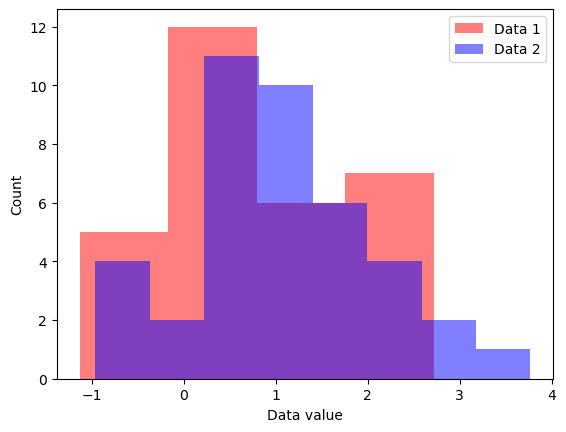

In [3]:
n1 = 30
n2 = 40
mu1 = 1
mu2 = 1.2

data1 = mu1 + np.random.randn(n1)/10
data2 = mu2 + np.random.randn(n2)/10

plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1')
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [7]:
t,p = stats.ttest_ind(data1,data2,equal_var=False)

df = n1+n2-2
print('t(%g) =  %g, p=%g'%(df,t,p))

t(68) =  -1.4315, p=0.157296


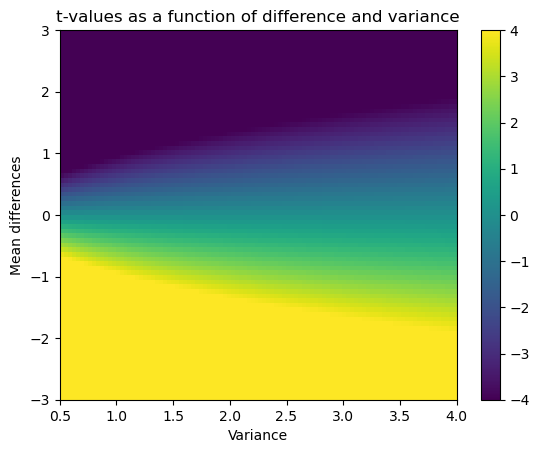

In [15]:
meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

n1 = 40
n2 = 30

allTvals = np.zeros((len(meandiffs),len(pooledvar)))

for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        
        df = n1 + n2 - 2
        s = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari])/df)
        t_den = s * np.sqrt(1/n1 + 1/n2)
        
        allTvals[meani,vari] = meandiffs[meani] / t_den


plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()